# Exploratory Data Analysis
## 1. Statistical analysis

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tmdb_data = pd.read_csv('clean_tmdb_movies.csv')

tmdb_data['release_date'] = pd.to_datetime(tmdb_data['release_date'], errors='coerce')
tmdb_data['release_year'] = tmdb_data['release_date'].dt.year

stats_summary = tmdb_data[['vote_average', 'popularity', 'vote_count', 'runtime', 'budget', 'revenue']].describe()

stats = stats_summary.style.format('{:,.2f}')  
stats.set_caption('Statistical Summary of Movie Data').background_gradient(axis=0)  

stats

,vote_average,popularity,vote_count,runtime,budget,revenue
count,"9,725.00","9,725.00","9,725.00","9,725.00","9,725.00","9,725.00"
mean,6.63,27.57,"1,989.02",105.98,"23,618,129.26","68,889,373.59"
std,0.78,137.35,"3,150.60",22.29,"40,322,363.47","160,378,919.28"
min,2.20,0.02,300.00,0.00,0.00,0.00
25%,6.10,11.37,467.00,94.00,0.00,0.00
50%,6.66,17.33,847.00,104.00,"8,000,000.00","12,600,000.00"
75%,7.20,28.54,"1,977.00",117.00,"30,000,000.00","63,800,000.00"
max,8.70,"12,413.09","36,637.00",367.00,"690,000,000.00","2,923,706,026.00"


#  2. Visualization
## 1) Most Common Movie Genres

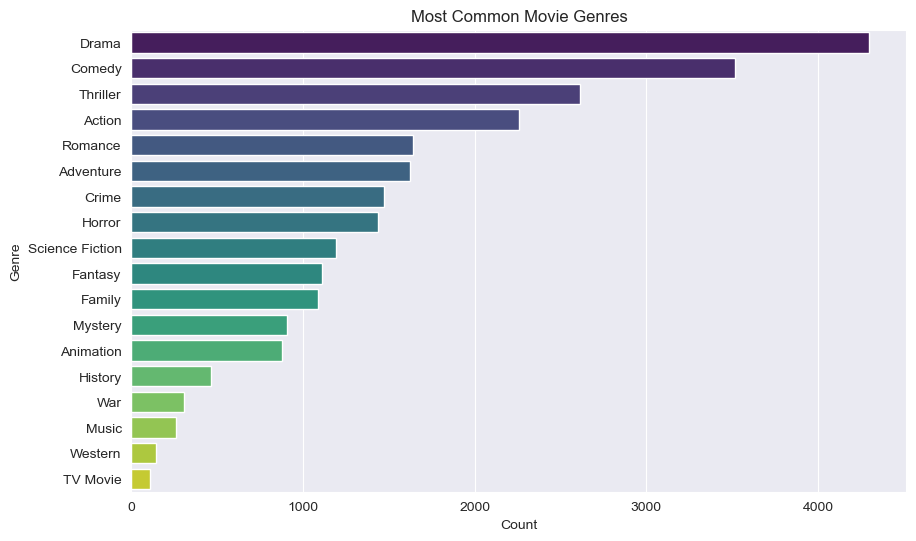

In [37]:
# Split and count genres
genre_counts = Counter([genre.strip() for genres in tmdb_data['genre_names'] for genre in genres.split(',')])
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')
plt.title('Most Common Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

## 2) Trends in Movie Releases Over Time

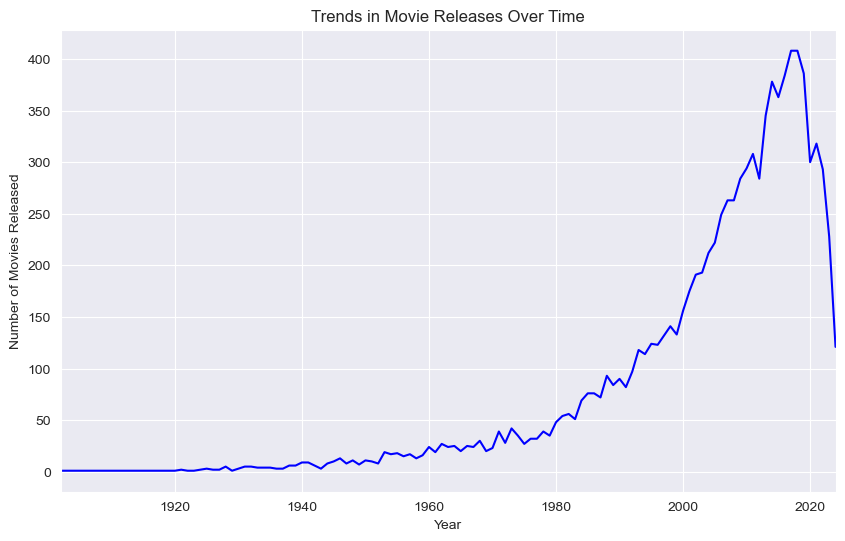

In [34]:
release_trends = tmdb_data.groupby('release_year').size()

plt.figure(figsize=(10, 6))
release_trends.plot(kind='line', color='blue')
plt.title('Trends in Movie Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.xlim(release_trends.index.min(), release_trends.index.max())
plt.show()

## 3) Distribution of Ratings

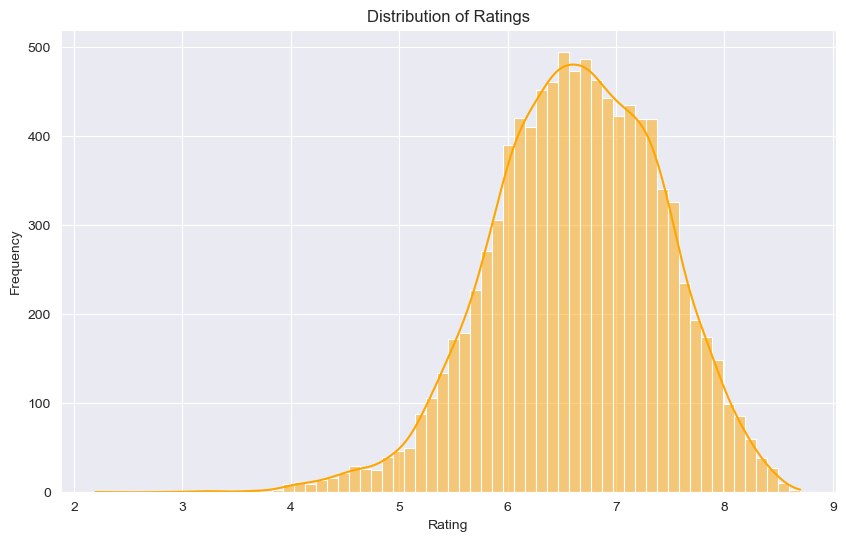

In [38]:
rating_distribution = tmdb_data['vote_average']


plt.figure(figsize=(10, 6))
sns.histplot(rating_distribution, kde=True, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 4) Correlation Heatmap

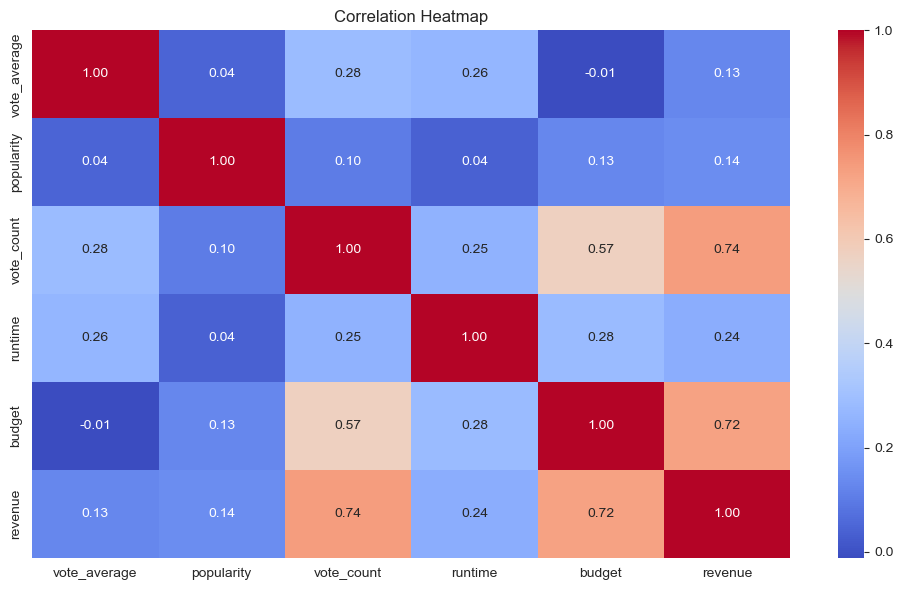

In [39]:
numerical_features = ['vote_average', 'popularity', 'vote_count', 'runtime', 'budget', 'revenue']
correlation_matrix = tmdb_data[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()